## Import libraries

In [1]:
!pip install liac-arff

  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11732 sha256=af2fabb5d4256672ea0330f6428c2fb113fee7061c29831486166958ade4293d
  Stored in directory: /root/.cache/pip/wheels/1f/0f/15/332ca86cbebf25ddf98518caaf887945fbe1712b97a0f2493b
Successfully built liac-arff


In [30]:
import pandas as pd # dataframe/data cleaning/manipulation
import numpy as np # array computations
import arff # read arff file
from matplotlib import pyplot as plt # plotting/graphing
from sklearn import tree # Decision tree algorithm
from sklearn.tree import plot_tree, export_text # plot model
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score # plot evaluations
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import requests # retrieve data from online

## Import Data

In [39]:
# get data from online
training_arff = requests.get('https://raw.githubusercontent.com/juwon0502/MIS-373-Predictive-Analytics/master/datasets/bank-training.arff')
testing_arff = requests.get('https://raw.githubusercontent.com/juwon0502/MIS-373-Predictive-Analytics/master/datasets/bank-NewCustomers.arff')

# read as arff file
training_arff = arff.load(training_arff.text)
testing_arff = arff.load(testing_arff.text)
col_val = [attribute[0] for attribute in training_arff['attributes']]

# transform arff file into pandas dataframe
training_df = pd.DataFrame(training_arff['data'], columns = col_val)
testing_df = pd.DataFrame(testing_arff['data'], columns = col_val)
meta = training_arff['attributes']

def clean_df(df):
  cols = list(df.columns)
  for col in cols:
    try:
      df = df.replace({col: {'YES': True, 'NO': False}})
    except:
      pass
    pass
  return df

training_df = clean_df(training_df)
training_df_dummy = pd.get_dummies(training_df)
testing_df_dummy = pd.get_dummies(clean_df(testing_df))

## Visualize Attributes

In [ ]:
def display_attribute(df, meta, col_name):
  col_val = [item[0] for item in meta]
  pep = df.loc[df['pep'] == True]
  pep_col_name = []
  no_pep_col_name = []
  if type(meta[col_val.index(col_name)][1]) == list:
    labels = meta[col_val.index(col_name)][1]
    for label in labels:
      no_pep_col_name.append(len(df.loc[df[col_name] == label]))
      pep_col_name.append(len(pep.loc[pep[col_name] == label]))

  else:
    labels = []
    min_val = int(min(df[col_name]))
    max_val = int(max(df[col_name]))
    rg = max_val - min_val
    if rg < 12:
      for x in range(min_val, max_val + 1):
        no_pep_col_name.append(len(df.loc[df[col_name] == x]))
        pep_col_name.append(len(pep.loc[pep[col_name] == x]))
        labels.append(x)
    else:
      for y in range(min_val, max_val, (rg//8)):
        no_pep_col_name.append(len(df.loc[df[col_name].between(y, y + (rg//8))]))
        pep_col_name.append(len(pep.loc[pep[col_name].between(y, y + (rg//8))]))
        labels.append(f"{y}-{y+(rg//8-1)}")

  if type(labels[0]) != str:
    labels = [str(label) for label in labels]
  plt.figure(dpi = 100)
  plt.bar(labels, no_pep_col_name, label = 'No PEP')
  plt.bar(labels, pep_col_name, label = 'Yes PEP')
  plt.legend()
  plt.title(f'{col_name} distribution')
  plt.show()

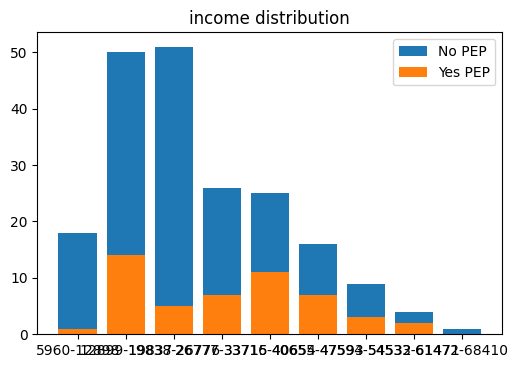

In [ ]:
display_attribute(training_df, meta, "income") # change the third parameter to change which attribute to display

## Create Model

In [40]:
X = training_df_dummy.drop(columns=['pep'])
y = training_df_dummy.pep

# varible to change depth of tree
max_depth = int(input("What is the maximum depth you want? "))
clf = tree.DecisionTreeClassifier(max_depth = max_depth, criterion = 'entropy')
model = clf.fit(X,y)

What is the maximum depth you want? 7


## Plot Tree

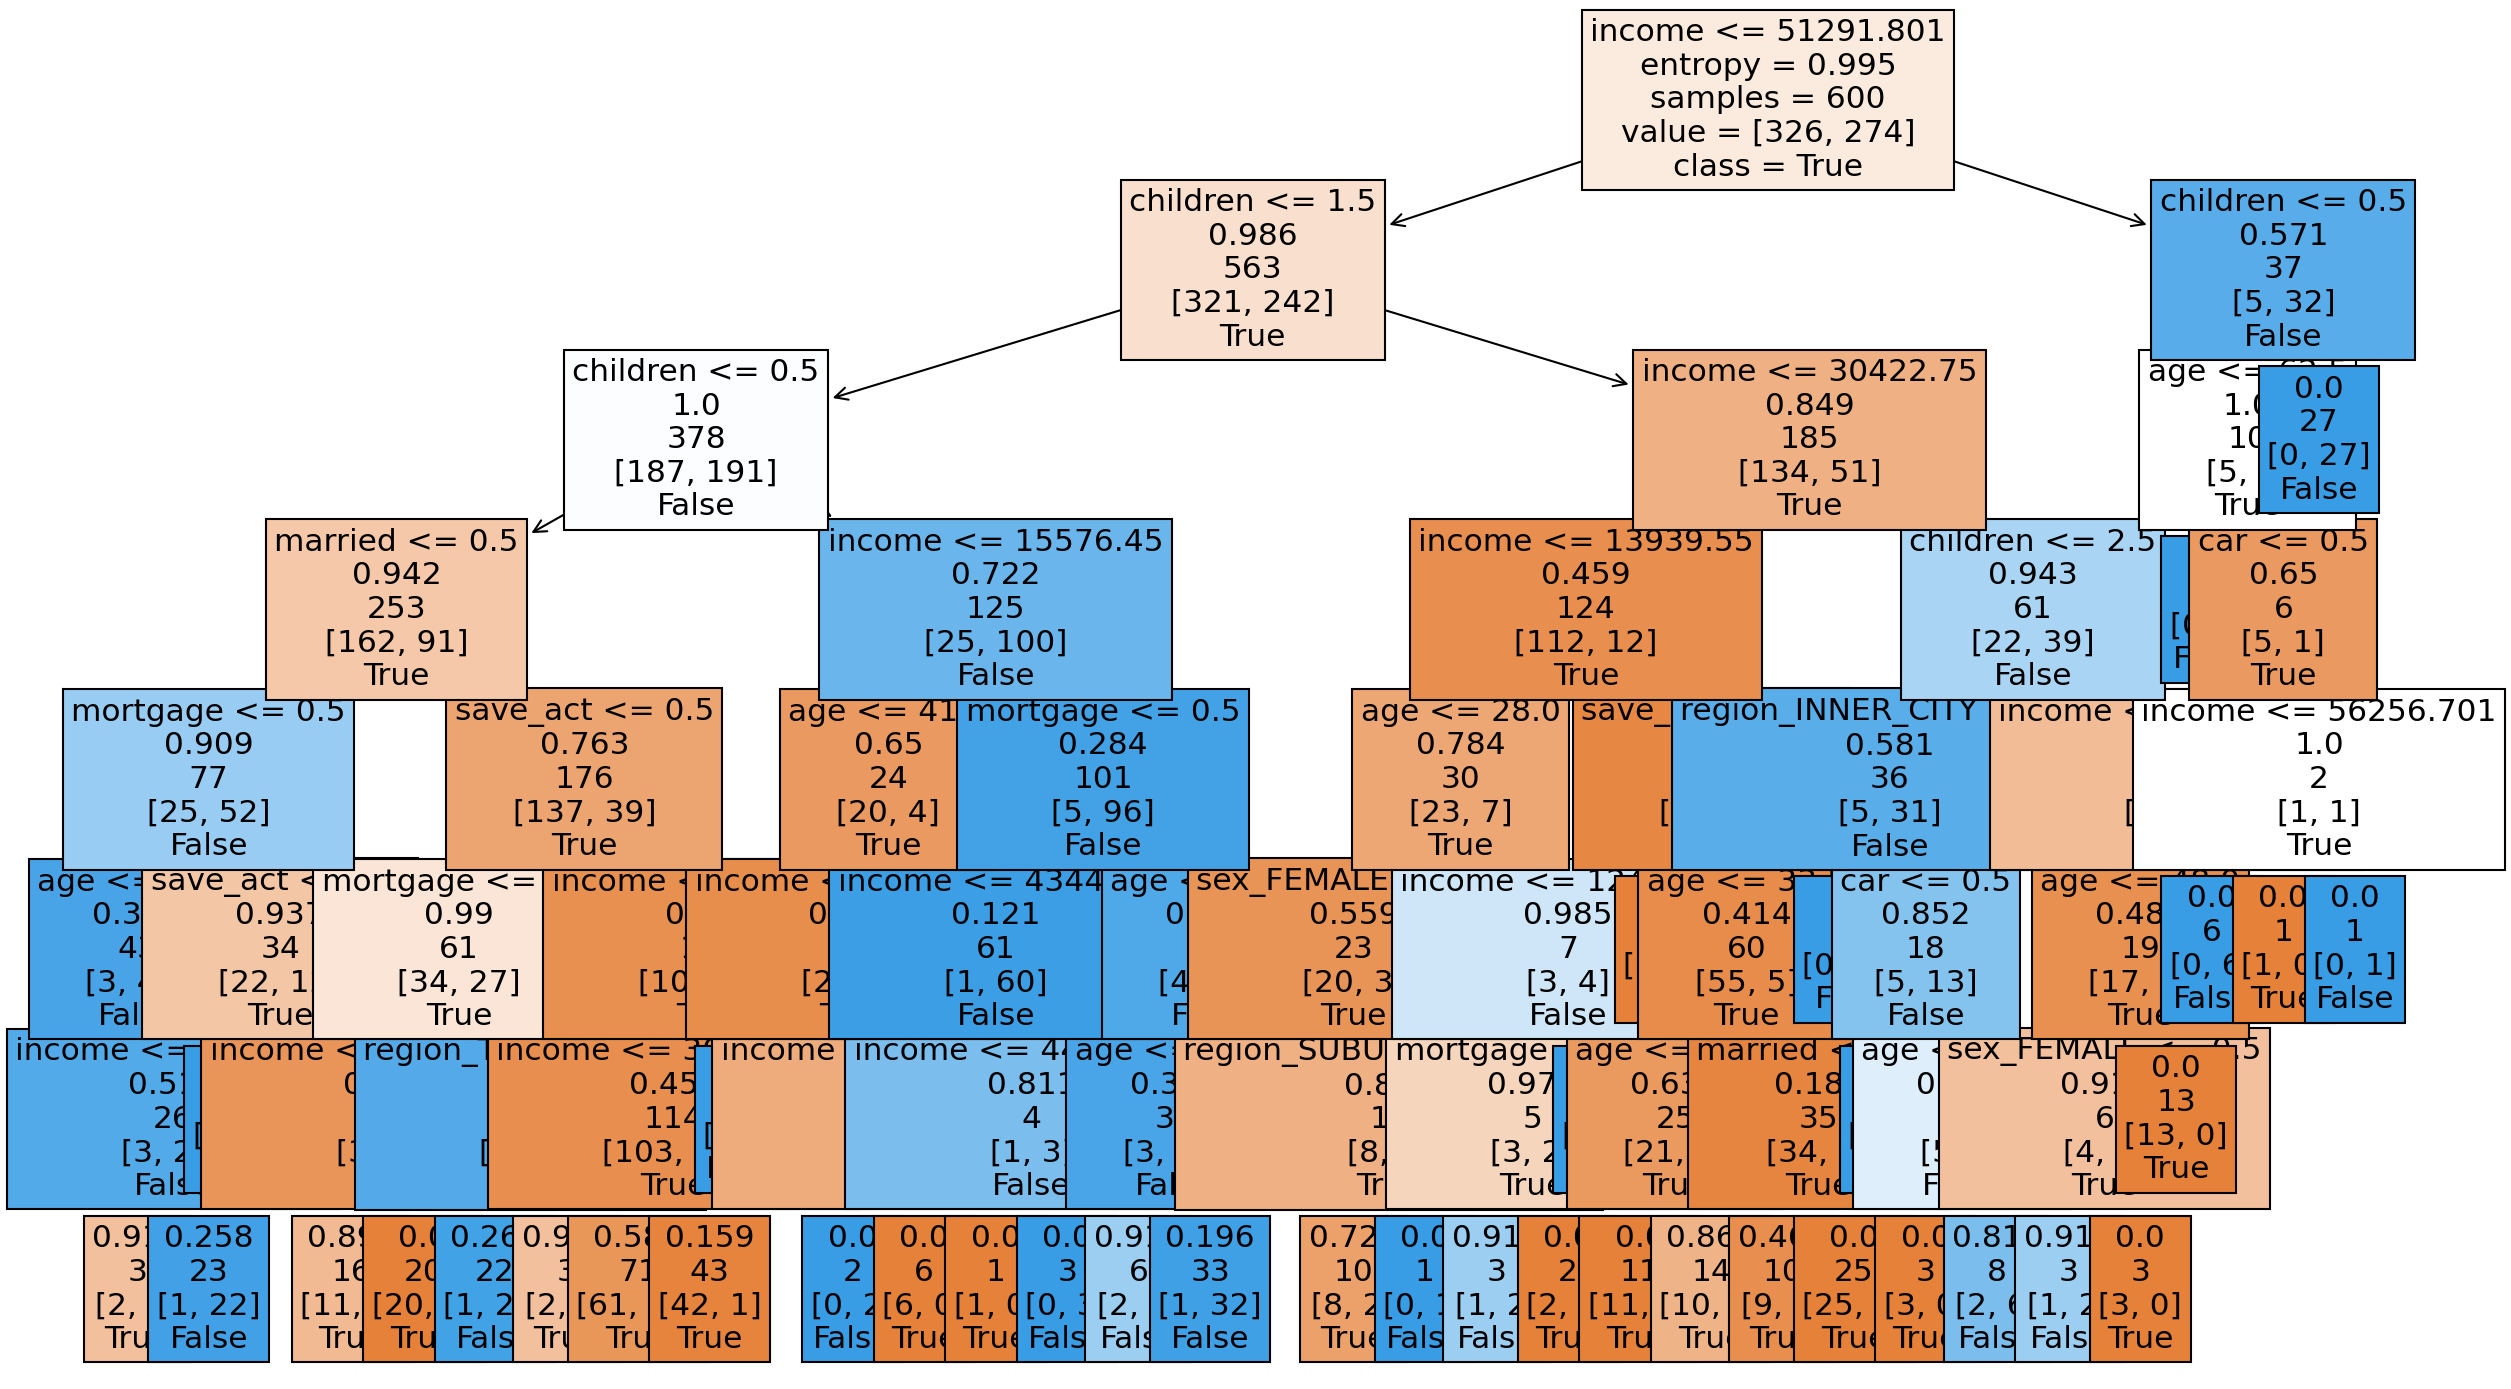

In [41]:
plt.figure(figsize = (20, 12), dpi = 150) # change dpi for size of image
tree.plot_tree(model, fontsize = 15, feature_names = X.columns, impurity = True,class_names = ["True", "False"], label = 'root', filled = True)
plt.show()

## Classification Accuracy

In [42]:
round(float(accuracy_score(model.predict(X), y)),4)

0.9433

## Model Evaluation

In [43]:
y_test = testing_df_dummy.pep
X_test = testing_df_dummy.drop(columns=['pep'])
predictions = model.predict(X_test)

### Confusion Matrix

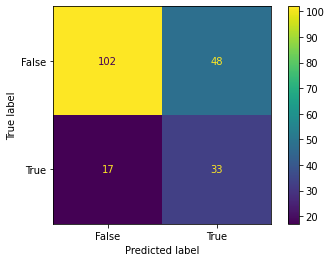

In [44]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

### ROC Curve

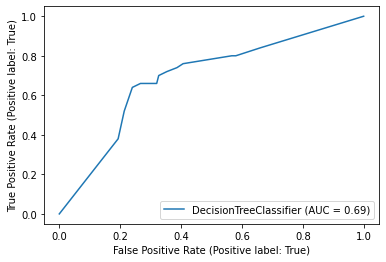

In [45]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()